# Homework Assignement 2 - Distances and Visualization

Beatriz Gamboa Pereira - 201705220

In [105]:
import pandas as pd
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Distances

4. Given two numerical arrays (for example two examples of iris flowers), apply Euclidean, Mahalanobis and Minkowski distances and discuss about the results. When is it more convenient to apply each one? (Notice that Mahalanobis was not given in class. Explore a bit more and discuss about advantages and disadvantages of using Mahalanobis).

The **Mahalanobis** distance is the distance between a point and a distribution. It measures how many standard deviations the point is away from the mean of the distribution. If the distribution has unit variance over all axes, the Mahalanobis distance becomes the Euclidean distance. We can also define it as a measure of how different two random vectors of the same distribution are. <br>
The formula for computing it is
$$
d\left(u,v\right)=\sqrt{(u-v) V^{-1}(u-v)^{T}}
$$
where $V$ is the covariance matrix of the distribution, and $u,v$ are the vectors we are comparing. If we are computing the distance between a point and a distribution, $u$ will be the observation and $v$ the mean of the set of observations.

This distance can also be seen as the distance of two points in multivariate space, and is therefore useful to find multivariate outliers, by indicating unusual combinations of two or more variables. <br>
The biggest disadvantage of using this distance is that as we see in the equation above, it requires that the inverse of the covariance matrix exists, which can't be calculated if the variables are highly correlated.

In [2]:
#arrays considered
c1 = np.array(iris.iloc[0,0:4])
c2 = np.array(iris.iloc[1,0:4])

def Euclidean(a1,a2):
    return np.sqrt(sum((a1-a2)**2))

def Minkowski(a1,a2,p):
    return sum((a1-a2)**p)**(1/p)

def Mahalanobis(dist,a1,a2=np.array(None)):
    if a2.any() == None:
        a2 = dist.mean()
    
    covariance = dist.cov()
    inv_cov    = np.linalg.inv(covariance)
    
    r1 = a1 - a2
    r2 = r1.T
    r_temp  = np.dot(r1,inv_cov)
    r_final = np.dot(r_temp,r2)
    
    return np.sqrt(r_final)

In [5]:
#comparing the results of the distances with the pre-defined functions and the funcions i made

#Euclidean
print("Euclidean distance between c1,c2")
print(Euclidean(c1,c2))
print(sp.distance.euclidean(c1,c2))
print('\n')

#Minkowski
print("Minkowski distance between c1,c2; p=3")
print(Minkowski(c1,c2,3))
print(sp.distance.minkowski(c1,c2,p=3))
print('\n')

#Mahalanobis
iris_inverse_covariance = np.linalg.inv(iris.cov())
iris_mean = np.array(iris.mean())
identity_covariance = np.identity(4)

print("Mahalanobis distance between c1,iris (point,dist)")
print(Mahalanobis(iris,c1))
print(sp.distance.mahalanobis(c1,iris_mean,iris_inverse_covariance))
print('\n')

print("Mahalanobis distance between c1,c2 (vector,vector)")
print(Mahalanobis(iris,c1,c2))
print(sp.distance.mahalanobis(c1,c2,iris_inverse_covariance))
print('\n')

print("We can check that Mahalanobis distance between c1,c2 (vector,vector) is Euclidean distance with identity covariance")
print(Euclidean(c1,c2))
print(sp.distance.mahalanobis(c1,c2,identity_covariance))
print('\n')

Euclidean distance between c1,c2
0.5385164807134502
0.5385164807134502


Minkowski distance between c1,c2; p=3
0.5104468722001463
0.5104468722001463


Mahalanobis distance between c1,iris (point,dist)
1.4609818353849708
1.4609818353849708


Mahalanobis distance between c1,c2 (vector,vector)
1.35445723989668
1.35445723989668


We can check that Mahalanobis distance between c1,c2 (vector,vector) is Euclidean distance with identity covariance
0.5385164807134502
0.5385164807134502




## Data Visualization

4. Each iris flower is described with 5 dimension. In python, explore different solutions using paneling, 3d plotting and using colors to show as many dimensions as possible in one figure (including the class).

As we can see, each iris flower is described with 5 dimensions: 4 numerical, and 1 categorical. We can represent them in many different ways, like paneling,....

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Paneling

Here we use paneling to look at the distributions for each variable (using histograms) and with a bar chart and pie chart for the class.

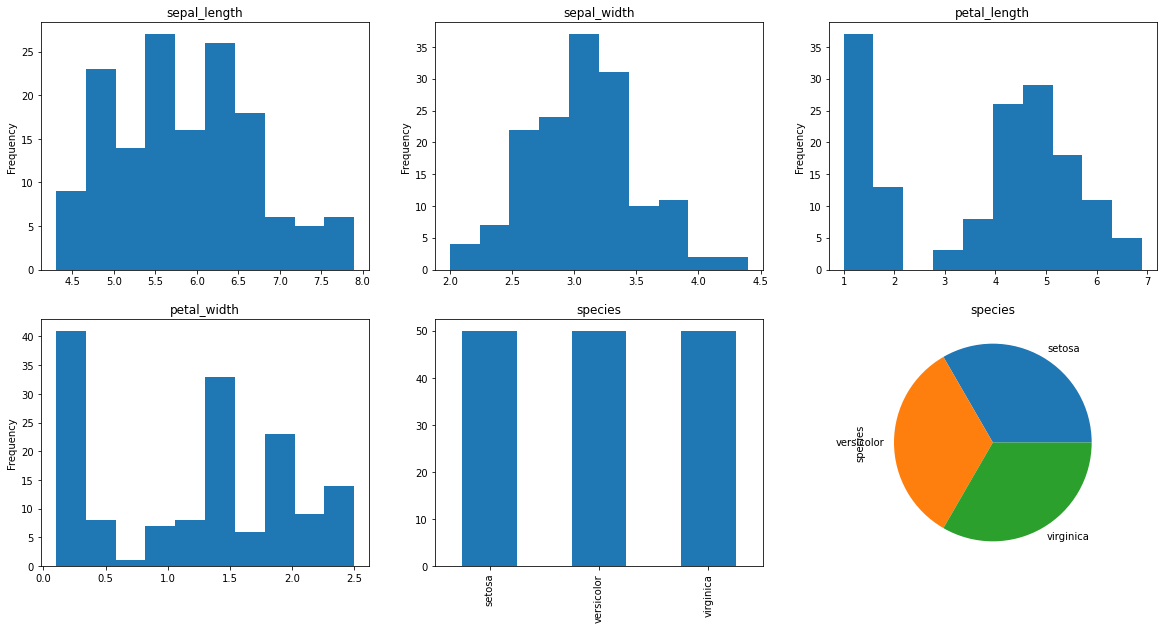

In [40]:
fig,ax = plt.subplots(2,3, figsize=(20,10))

count=0
columns = iris.columns

for i in range(4):
    col = columns[i]
    #posicao = int('1' + str(count%3) + str(count%2))
    iris[col].plot.hist(ax = ax[count//3,count%3])
    ax[count//3,count%3].title.set_text(col)
    count += 1

iris[columns[4]].value_counts().plot.bar(ax=ax[1,1])
ax[1,1].title.set_text(columns[4])

iris[columns[4]].value_counts().plot.pie(ax=ax[1,2])
ax[1,2].title.set_text(columns[4])

plt.show()

### Radar Chart

In this radar chart, we have a comparison of where all the lengths for each flower are distributed, we can see a pattern according to their species.

<ipython-input-96-59c63089cbef>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


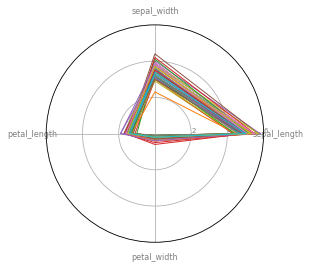

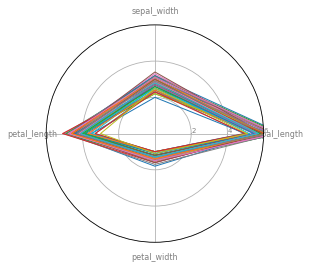

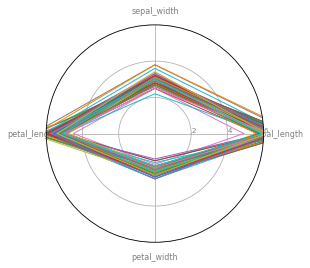

In [96]:
for i in range(3):
    i_max = [49,99,149]
    i_min = [0,50,100]
    l = i_min[i]
    for j in range(50):        
        categories=list(iris)[:-1]
        N = len(categories) 
        values=iris.loc[l].drop('species').values.flatten().tolist()
        values += values[:1]
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]

        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color='grey', size=8)
        ax.set_rlabel_position(0)
        plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
        plt.ylim(0,6)
        ax.plot(angles, values, linewidth=1, linestyle='solid')
        l += 1
    plt.show()

### Parallel plot

In this paralell plot we can see again the comparison between the 4 lengths for each species. We can check the results are similar to the radar plot.

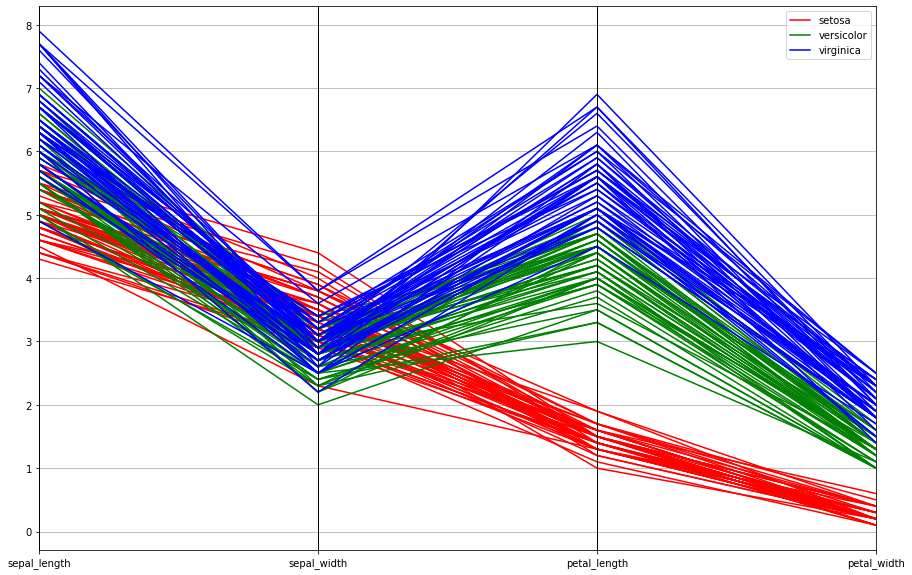

In [93]:
fig, ax=plt.subplots(1,1, figsize=(15,10))
pd.plotting.parallel_coordinates(iris,'species', color=('red','green','blue'), ax=ax)
plt.show()

### 3D plot

When we make a 3D plot we must always leave one of the numerical variables out. We have some examples

Text(0.5, 0, 'petal_width')

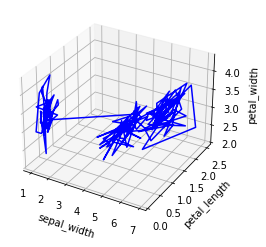

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.array(iris.iloc[:,1])
xline = np.array(iris.iloc[:,2])
yline = np.array(iris.iloc[:,3])
ax.plot3D(xline, yline, zline, 'blue')
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')
#relationship between sepal_width, petal_width, petal_length

### 4D plot

With a 4D plot we can plot the missing numerical variable with a heatmap.

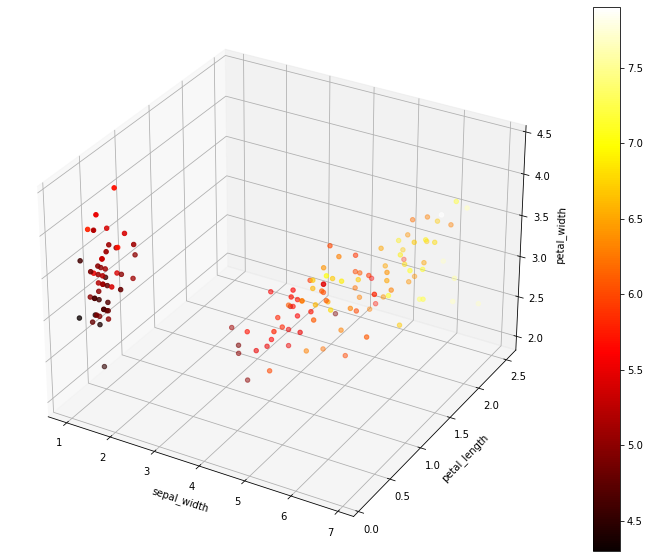

In [111]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x = np.array(iris.iloc[:,2])
y = np.array(iris.iloc[:,3])
z = np.array(iris.iloc[:,1])
c = np.array(iris.iloc[:,0])

ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()